# Wojciech Pragłowski

## Web-scraping Silesian University of Technology site

### Exercise 1

In [2]:
import webbrowser
import requests
from bs4 import BeautifulSoup

polsl = requests.get("https://ms.polsl.pl/kzmimsi/pracownicy/")
soup = BeautifulSoup(polsl.content, 'html.parser')

In [3]:
pracownik = soup.find_all('strong', limit=31)
pracownicy = [i.get_text() for i in pracownik]

profesorowie = [i for i in pracownicy if i.startswith('prof')]
profesorowie_polsl = [i for i in pracownicy if i.endswith(' PŚ')]

for i in profesorowie_polsl:
    profesorowie.append(i)

doktorzy = []
for i in pracownicy:
    if i.startswith('dr') and not i.endswith(' PŚ'):
        doktorzy.append(i)
        
magistrzy = [i for i in pracownicy if i.startswith('mgr')]
print("Professors: ", profesorowie, "\n\nDoctors: ", doktorzy, "\n\nMasters: ", magistrzy)

Professors:  ['prof. dr hab. Mykola Bratiichuk', 'prof. dr hab. inż. Damian Słota', 'prof. dr hab. Orest Artemovych', 'prof. Rytis Maskeliunas', 'prof. dr hab. inż. Radosław Grzymkowski', 'dr hab. inż. Edyta Hetmaniok, prof. PŚ', 'dr hab. inż. Waldemar Hołubowski, prof. PŚ', 'dr hab. inż. Wojciech Kempa, prof. PŚ', 'dr hab. Iwona Nowak, prof. PŚ', 'dr hab. inż. Marcin Woźniak, prof. PŚ'] 

Doctors:  ['dr Katarzyna Adrianowicz', 'dr inż. Marek Balcer', 'dr inż. Rafał Brociek', 'dr Giacomo Capizzi', 'dr Robertas Damaševičius', 'dr inż. Konrad Kaczmarek', 'dr inż. Adrian Kapczyński', 'dr inż. Jarosław Karcewicz', 'dr inż. Marcin Lawnik', 'dr Ewa Łobos', 'dr Zbigniew Marszałek', 'dr inż. Elwira Mateja-Losa', 'dr Sebastian Pabiasz', 'dr inż. Mariusz Pleszczyński', 'dr inż. Dawid Połap', 'dr inż. Marcin Sobota', 'dr inż. Zdzisław Sroczyński', 'dr inż. Adam Zielonka'] 

Masters:  ['mgr inż. Arkadiusz Banasik', 'mgr Martyna Kobielnik', 'mgr Hanna Wójtowicz']


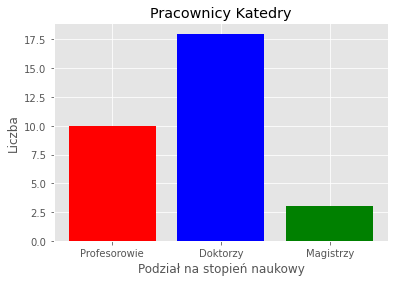

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
x = ['Profesorowie', 'Doktorzy', 'Magistrzy']
y = [len(profesorowie), len(doktorzy), len(magistrzy)]
col = ['red', 'blue', 'green']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color=col)
plt.xlabel("Podział na stopień naukowy")
plt.ylabel("Liczba")
plt.title("Pracownicy Katedry")

plt.xticks(x_pos, x)
plt.show()

### Exercise 2

In [23]:
page = requests.get("https://rekrutacja.polsl.pl/wyszukiwarka-kierunkow-i-stopnia/?pa_kierunek=inf")
polsl_soup = BeautifulSoup(page.content, "html.parser")
all_a = polsl_soup.find_all('a')

linki = [i.get('href') for i in all_a]
good_linki = [i for i in linki if i != None]

powielone = [i for i in good_linki if i.startswith('https://rekrutacja.polsl.pl/kierunek')]
kierunki = []
for kierunek in powielone:
    if kierunek not in kierunki:
        kierunki.append(kierunek)
    else:
        continue
kierunki

['https://rekrutacja.polsl.pl/kierunek/inf-wms/',
 'https://rekrutacja.polsl.pl/kierunek/rau_inf_nst/',
 'https://rekrutacja.polsl.pl/kierunek/rau_inf_st/',
 'https://rekrutacja.polsl.pl/kierunek/rau_informatyka_st/',
 'https://rekrutacja.polsl.pl/kierunek/rms_informatyka_st/']

In [24]:
f = open(r'nowy.html', 'r')
s = f.read()
new_soup = BeautifulSoup(s, 'html.parser')

In [26]:
original_tag = new_soup.body
original_tag.clear()

for i in range(len(kierunki)):
    new_tag_p = new_soup.new_tag('h1', id='kierunek'+str(i))
    new_tag_a = new_soup.new_tag('a')
    new_tag_a.attrs['href'] = kierunki[i]
    new_tag_a.append(kierunki[i])
    new_tag_p.append(new_tag_a)
    original_tag.append(new_tag_p)
original_tag

<body><h1 id="kierunek0"><a href="https://rekrutacja.polsl.pl/kierunek/inf-wms/">https://rekrutacja.polsl.pl/kierunek/inf-wms/</a></h1><h1 id="kierunek1"><a href="https://rekrutacja.polsl.pl/kierunek/rau_inf_nst/">https://rekrutacja.polsl.pl/kierunek/rau_inf_nst/</a></h1><h1 id="kierunek2"><a href="https://rekrutacja.polsl.pl/kierunek/rau_inf_st/">https://rekrutacja.polsl.pl/kierunek/rau_inf_st/</a></h1><h1 id="kierunek3"><a href="https://rekrutacja.polsl.pl/kierunek/rau_informatyka_st/">https://rekrutacja.polsl.pl/kierunek/rau_informatyka_st/</a></h1><h1 id="kierunek4"><a href="https://rekrutacja.polsl.pl/kierunek/rms_informatyka_st/">https://rekrutacja.polsl.pl/kierunek/rms_informatyka_st/</a></h1></body>

In [27]:
html = new_soup.prettify('utf-8')

with open('kierunki.html', 'wb') as file:
    file.write(html)